In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np



from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC




In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()



<class 'pandas.core.frame.DataFrame'>
Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October          6

In [4]:
filtered_data5['Target'] = filtered_data5['DiedCases'].apply(lambda x: 1 if x > 0 else 0)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2466/3710019703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Target'] = filtered_data5['DiedCases'].apply(lambda x: 1 if x > 0 else 0)


In [5]:
filtered_data5['Target'].value_counts()

Target
0    5642
1     444
Name: count, dtype: int64

In [6]:
data

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54033,1,1,1.000000,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54034,1,2,2.000000,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54035,1,6,6.000000,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
54036,1,1,1.000000,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
filtered_data5['target'].value_counts()


KeyError: 'target'

In [9]:
X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male','Female',
                   
                   'Regional','MajorCities',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                 
                   'CovidPrd']]

y = filtered_data5['Target']  # برچسب‌ها


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X_res ,y_res, test_size=0.2, random_state=42)


In [10]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(n_neighbors=20)
X_res, y_res = ncr.fit_resample(X , y)
y_res.value_counts()

Target
0    2903
1     444
Name: count, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# تعریف مدل
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی مدل
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       561
           1       0.76      0.55      0.64       109

    accuracy                           0.90       670
   macro avg       0.84      0.76      0.79       670
weighted avg       0.89      0.90      0.89       670



In [14]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)


# ارزیابی مدل
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.908955223880597
Confusion Matrix:
 [[547  14]
 [ 47  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       561
           1       0.82      0.57      0.67       109

    accuracy                           0.91       670
   macro avg       0.87      0.77      0.81       670
weighted avg       0.90      0.91      0.90       670

Precision: 0.8157894736842105
Recall: 0.5688073394495413
F1-score: 0.6702702702702703


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# تعریف مدل لاجستیک رگرسیون
logreg_model = LogisticRegression(random_state=42)

# آموزش مدل
logreg_model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred_logreg = logreg_model.predict(X_test)

# ارزیابی مدل
acc_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# چاپ نتایج
print('Accuracy:', acc_logreg)
print('Confusion Matrix:\n', conf_matrix_logreg)
print('Classification Report:\n', class_report_logreg)
print('Precision:', precision_logreg)
print('Recall:', recall_logreg)
print('F1-score:', f1_logreg)

Accuracy: 0.8925373134328358
Confusion Matrix:
 [[552   9]
 [ 63  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       561
           1       0.84      0.42      0.56       109

    accuracy                           0.89       670
   macro avg       0.87      0.70      0.75       670
weighted avg       0.89      0.89      0.88       670

Precision: 0.8363636363636363
Recall: 0.42201834862385323
F1-score: 0.5609756097560976


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# تعریف مدل درخت تصمیم
dt_model = DecisionTreeClassifier(random_state=42)

# آموزش مدل
dt_model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred_dt = dt_model.predict(X_test)

# ارزیابی مدل
acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# چاپ نتایج
print('Accuracy:', acc_dt)
print('Confusion Matrix:\n', conf_matrix_dt)
print('Classification Report:\n', class_report_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1-score:', f1_dt)

Accuracy: 0.8865671641791045
Confusion Matrix:
 [[536  25]
 [ 51  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       561
           1       0.70      0.53      0.60       109

    accuracy                           0.89       670
   macro avg       0.81      0.74      0.77       670
weighted avg       0.88      0.89      0.88       670

Precision: 0.6987951807228916
Recall: 0.5321100917431193
F1-score: 0.6041666666666666


In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# تعریف مدل AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)

# آموزش مدل
adaboost_model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred_adaboost = adaboost_model.predict(X_test)

# ارزیابی مدل
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_report_adaboost = classification_report(y_test, y_pred_adaboost)

precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# چاپ نتایج
print('Accuracy:', acc_adaboost)
print('Confusion Matrix:\n', conf_matrix_adaboost)
print('Classification Report:\n', class_report_adaboost)
print('Precision:', precision_adaboost)
print('Recall:', recall_adaboost)
print('F1-score:', f1_adaboost)

Accuracy: 0.8835820895522388
Confusion Matrix:
 [[549  12]
 [ 66  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       561
           1       0.78      0.39      0.52       109

    accuracy                           0.88       670
   macro avg       0.84      0.69      0.73       670
weighted avg       0.87      0.88      0.87       670

Precision: 0.7818181818181819
Recall: 0.3944954128440367
F1-score: 0.524390243902439


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
#X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

# تعریف مدل Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# آموزش مدل
gb_model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred_gb = gb_model.predict(X_test)

# ارزیابی مدل
acc_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# چاپ نتایج
print('Accuracy:', acc_gb)
print('Confusion Matrix:\n', conf_matrix_gb)
print('Classification Report:\n', class_report_gb)
print('Precision:', precision_gb)
print('Recall:', recall_gb)
print('F1-score:', f1_gb)

Accuracy: 0.9044776119402985
Confusion Matrix:
 [[554   7]
 [ 57  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       561
           1       0.88      0.48      0.62       109

    accuracy                           0.90       670
   macro avg       0.89      0.73      0.78       670
weighted avg       0.90      0.90      0.89       670

Precision: 0.8813559322033898
Recall: 0.47706422018348627
F1-score: 0.6190476190476191


In [19]:
y_pred_proba_svm = xgb_model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 1000)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.2032032032032032
مقدار F1 Score بهترین آستانه: 0.75


Top features impacting class 1 predictions:


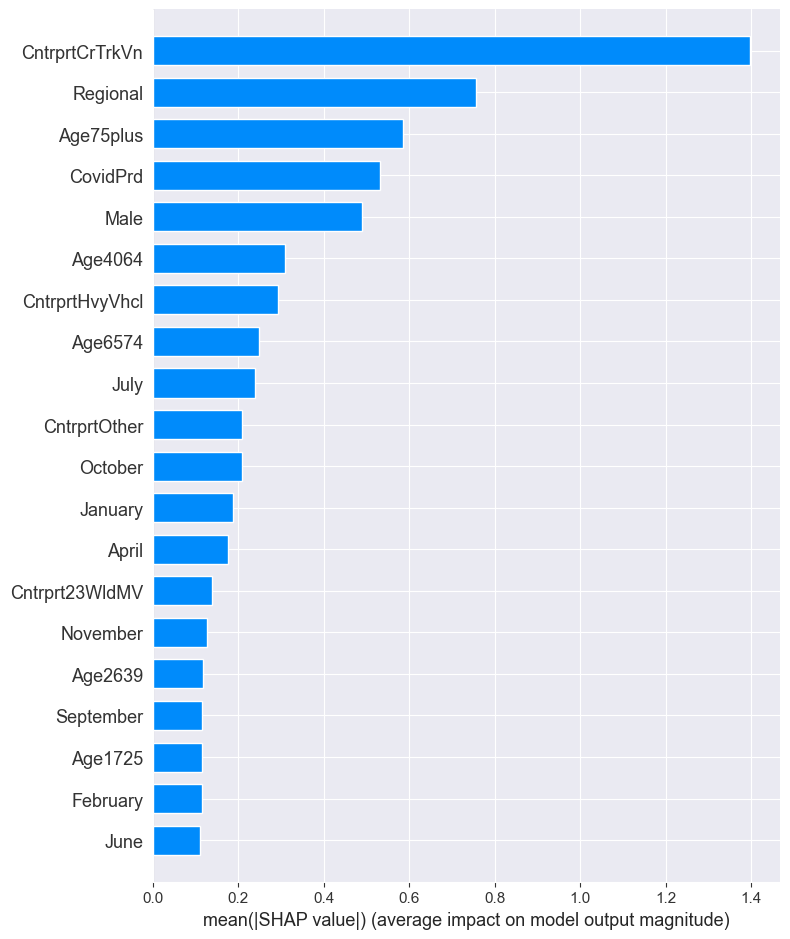

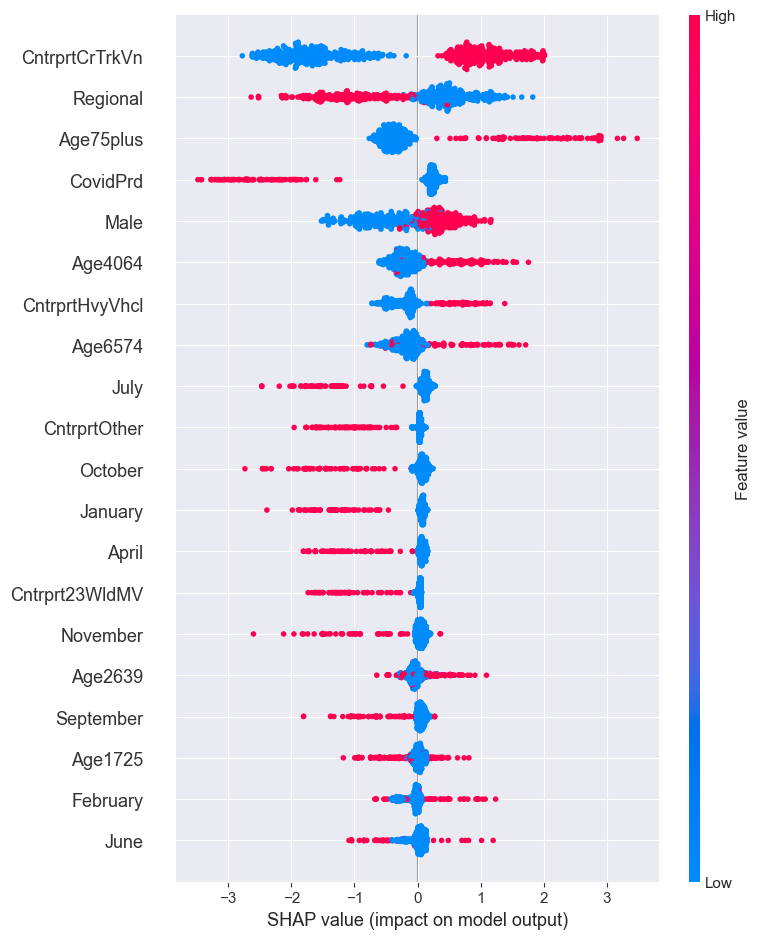

In [13]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# محاسبه SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# اگر shap_values یک لیست است، کلاس ۱ را جدا کنید
if isinstance(shap_values, list):
    shap_values_class_1 = shap_values[1]  # مقدار کلاس ۱
else:
    # برای مدل‌هایی که خروجی یک ماتریس دارند
    shap_values_class_1 = shap_values

# نمایش خلاصه بصری برای کلاس ۱
print("Top features impacting class 1 predictions:")
shap.summary_plot(shap_values_class_1, X_test, plot_type="bar")

# نمای کلی SHAP برای کلاس ۱
shap.summary_plot(shap_values_class_1, X_test)
